In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0001028.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

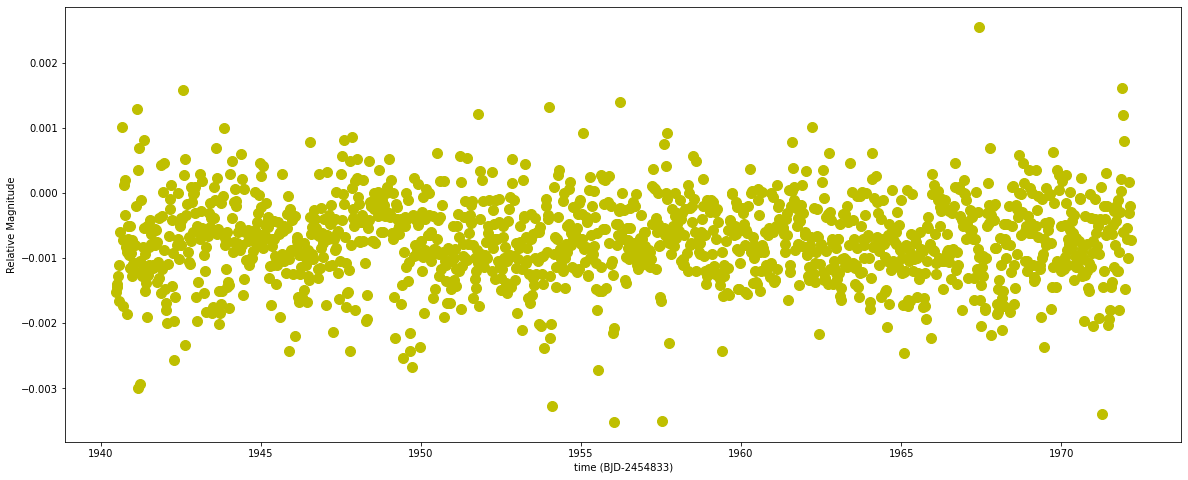

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0001028')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200817 20:21:43 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200817 20:21:43 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200817 20:21:47 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200817 20:21:47 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200817 20:21:52 nonphysical:216] spline fit done. nknots = 13,  chisq = 12672180.32115, reduced chisq = 9414.69563
[I 200817 20:21:52 png:696] plotting phased LC with period 0.322048, epoch 1950.14172
[I 200817 20:21:52 nonphysical:216] spline fit done. nknots = 13,  chisq = 12895837.86463, reduced chisq = 9580.86023
[I 200817 20:21:52 png:696] plotting phased LC with period 0.161024, epoch 1964.95470
[I 200817 20:21:52 nonphysical:216] spline fit done. nknots = 13,  chisq = 12595090.04636, reduced chisq = 9357.42203
[I 200817 20:21:52 png:696] plotting phased LC with period 0.644097, epoch 1949.30402
[I 200817 20:21:52 nonphysical:216] spline fit done. nknots = 13,  chisq = 12816152.90062, reduced chisq = 9521.65892
[I 200817 20:21:52 png:696] plotting phased LC with period 0.168025, epoch 1953.24733
[I 200817 20:21:52 nonphysical:216] spline fit done. nknots = 13,  chisq = 12973642.20792, reduced chisq = 9638.66434
[I 200817 20:21:52 png:696] plotting phased LC with period 0.10143

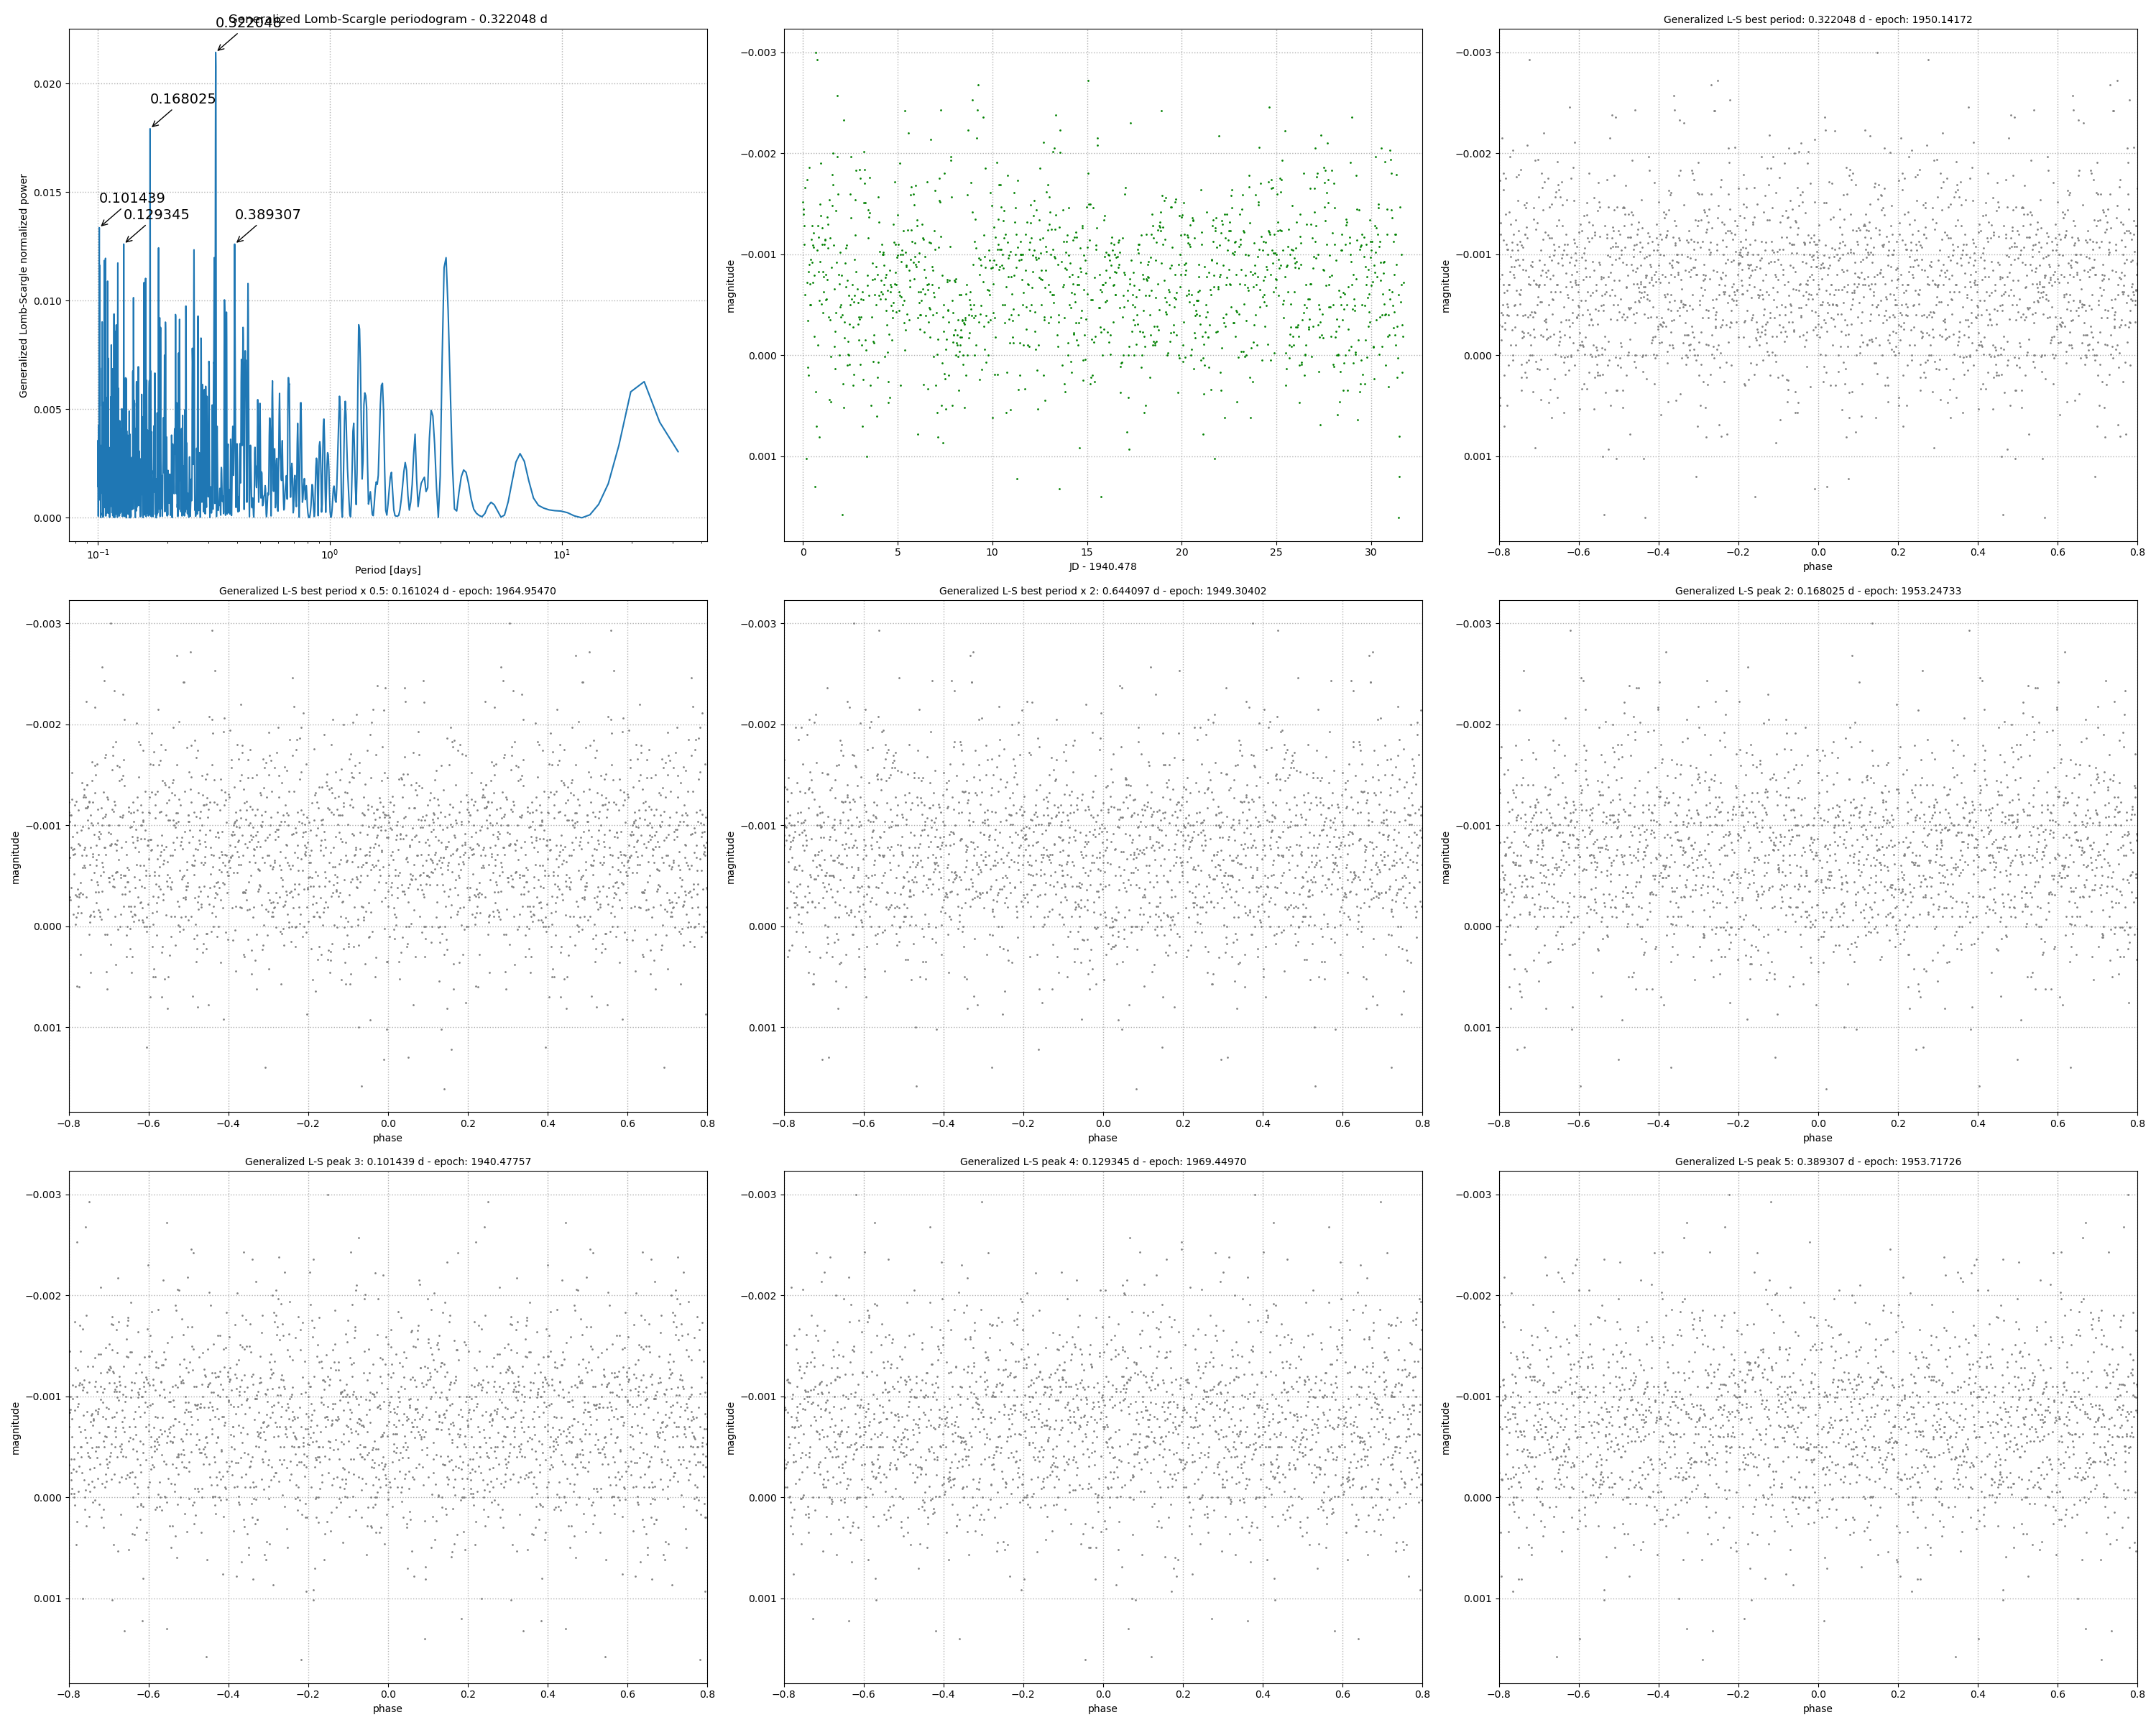

In [8]:
from IPython.display import Image
Image('0001028-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.322048416361789,
 'bestlspval': 0.02143444764522706,
 'nbestpeaks': 5,
 'nbestlspvals': [0.02143444764522706,
  0.017921507587813454,
  0.013358664695415535,
  0.012604268440058061,
  0.012603166872433225],
 'nbestperiods': [0.322048416361789,
  0.16802526071049861,
  0.10143906584507055,
  0.12934515987755119,
  0.3893066851351356],
 'lspvals': array([0.0030444 , 0.00439997, 0.00627021, ..., 0.00262117, 0.00201435,
        0.00144203]),
 'omegas': array([ 0.19827301,  0.23792761,  0.27758222, ..., 62.7335807 ,
        62.7732353 , 62.8128899 ]),
 'periods': array([31.68956417, 26.40797014, 22.63540298, ...,  0.10015665,
         0.10009338,  0.10003019]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.322048416361789, 0.16802526071049861, 0.10143906584507055, 0.12934515987755119, 0.3893066851351356] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200817 20:22:40 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200817 20:22:40 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889032447996576e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200817 20:22:40 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200817 20:22:40 abls:969] new minfreq: 0.06311225958397261, maxfreq: 10.0
[I 200817 20:22:40 abls:980] using 6 workers...
[I 200817 20:22:40 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200817 20:22:40 abls:1090] worker 2: minfreq = 1.728093, nfreqs = 21105
[I 200817 20:22:40 abls:1090] worker 3: minfreq = 3.393073, nfreqs = 21105
[I 200817 20:22:40 abls:1090] worker 4: minfreq = 5.058053, nfreqs = 21105
[I 200817 20:22:40 abls:1090] worker 5: minfreq = 6.723033, nfreqs = 21105
[I 200817 20:22:40 abls:1090] worker 6: minfreq = 8.388014, nfreq

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[W 200817 20:22:52 png:1142] no best period found for this object, skipping...


In [13]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200817 20:22:56 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200817 20:22:56 spdm:349] using 6 workers...


In [14]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200817 20:23:00 nonphysical:216] spline fit done. nknots = 13,  chisq = 12977069.33287, reduced chisq = 9641.21050
[I 200817 20:23:00 png:696] plotting phased LC with period 2.005669, epoch 1940.47757
[I 200817 20:23:00 nonphysical:216] spline fit done. nknots = 13,  chisq = 13125408.48651, reduced chisq = 9751.41789
[I 200817 20:23:00 png:696] plotting phased LC with period 1.002834, epoch 1967.28392
[I 200817 20:23:00 nonphysical:216] spline fit done. nknots = 13,  chisq = 13077905.26213, reduced chisq = 9716.12575
[I 200817 20:23:00 png:696] plotting phased LC with period 4.011337, epoch 1940.47757
[I 200817 20:23:00 nonphysical:216] spline fit done. nknots = 13,  chisq = 13285886.82290, reduced chisq = 9870.64400
[I 200817 20:23:00 png:696] plotting phased LC with period 14.404347, epoch 1955.69913
[I 200817 20:23:00 nonphysical:216] spline fit done. nknots = 13,  chisq = 13038906.03378, reduced chisq = 9687.15159
[I 200817 20:23:00 png:696] plotting phased LC with period 12.188

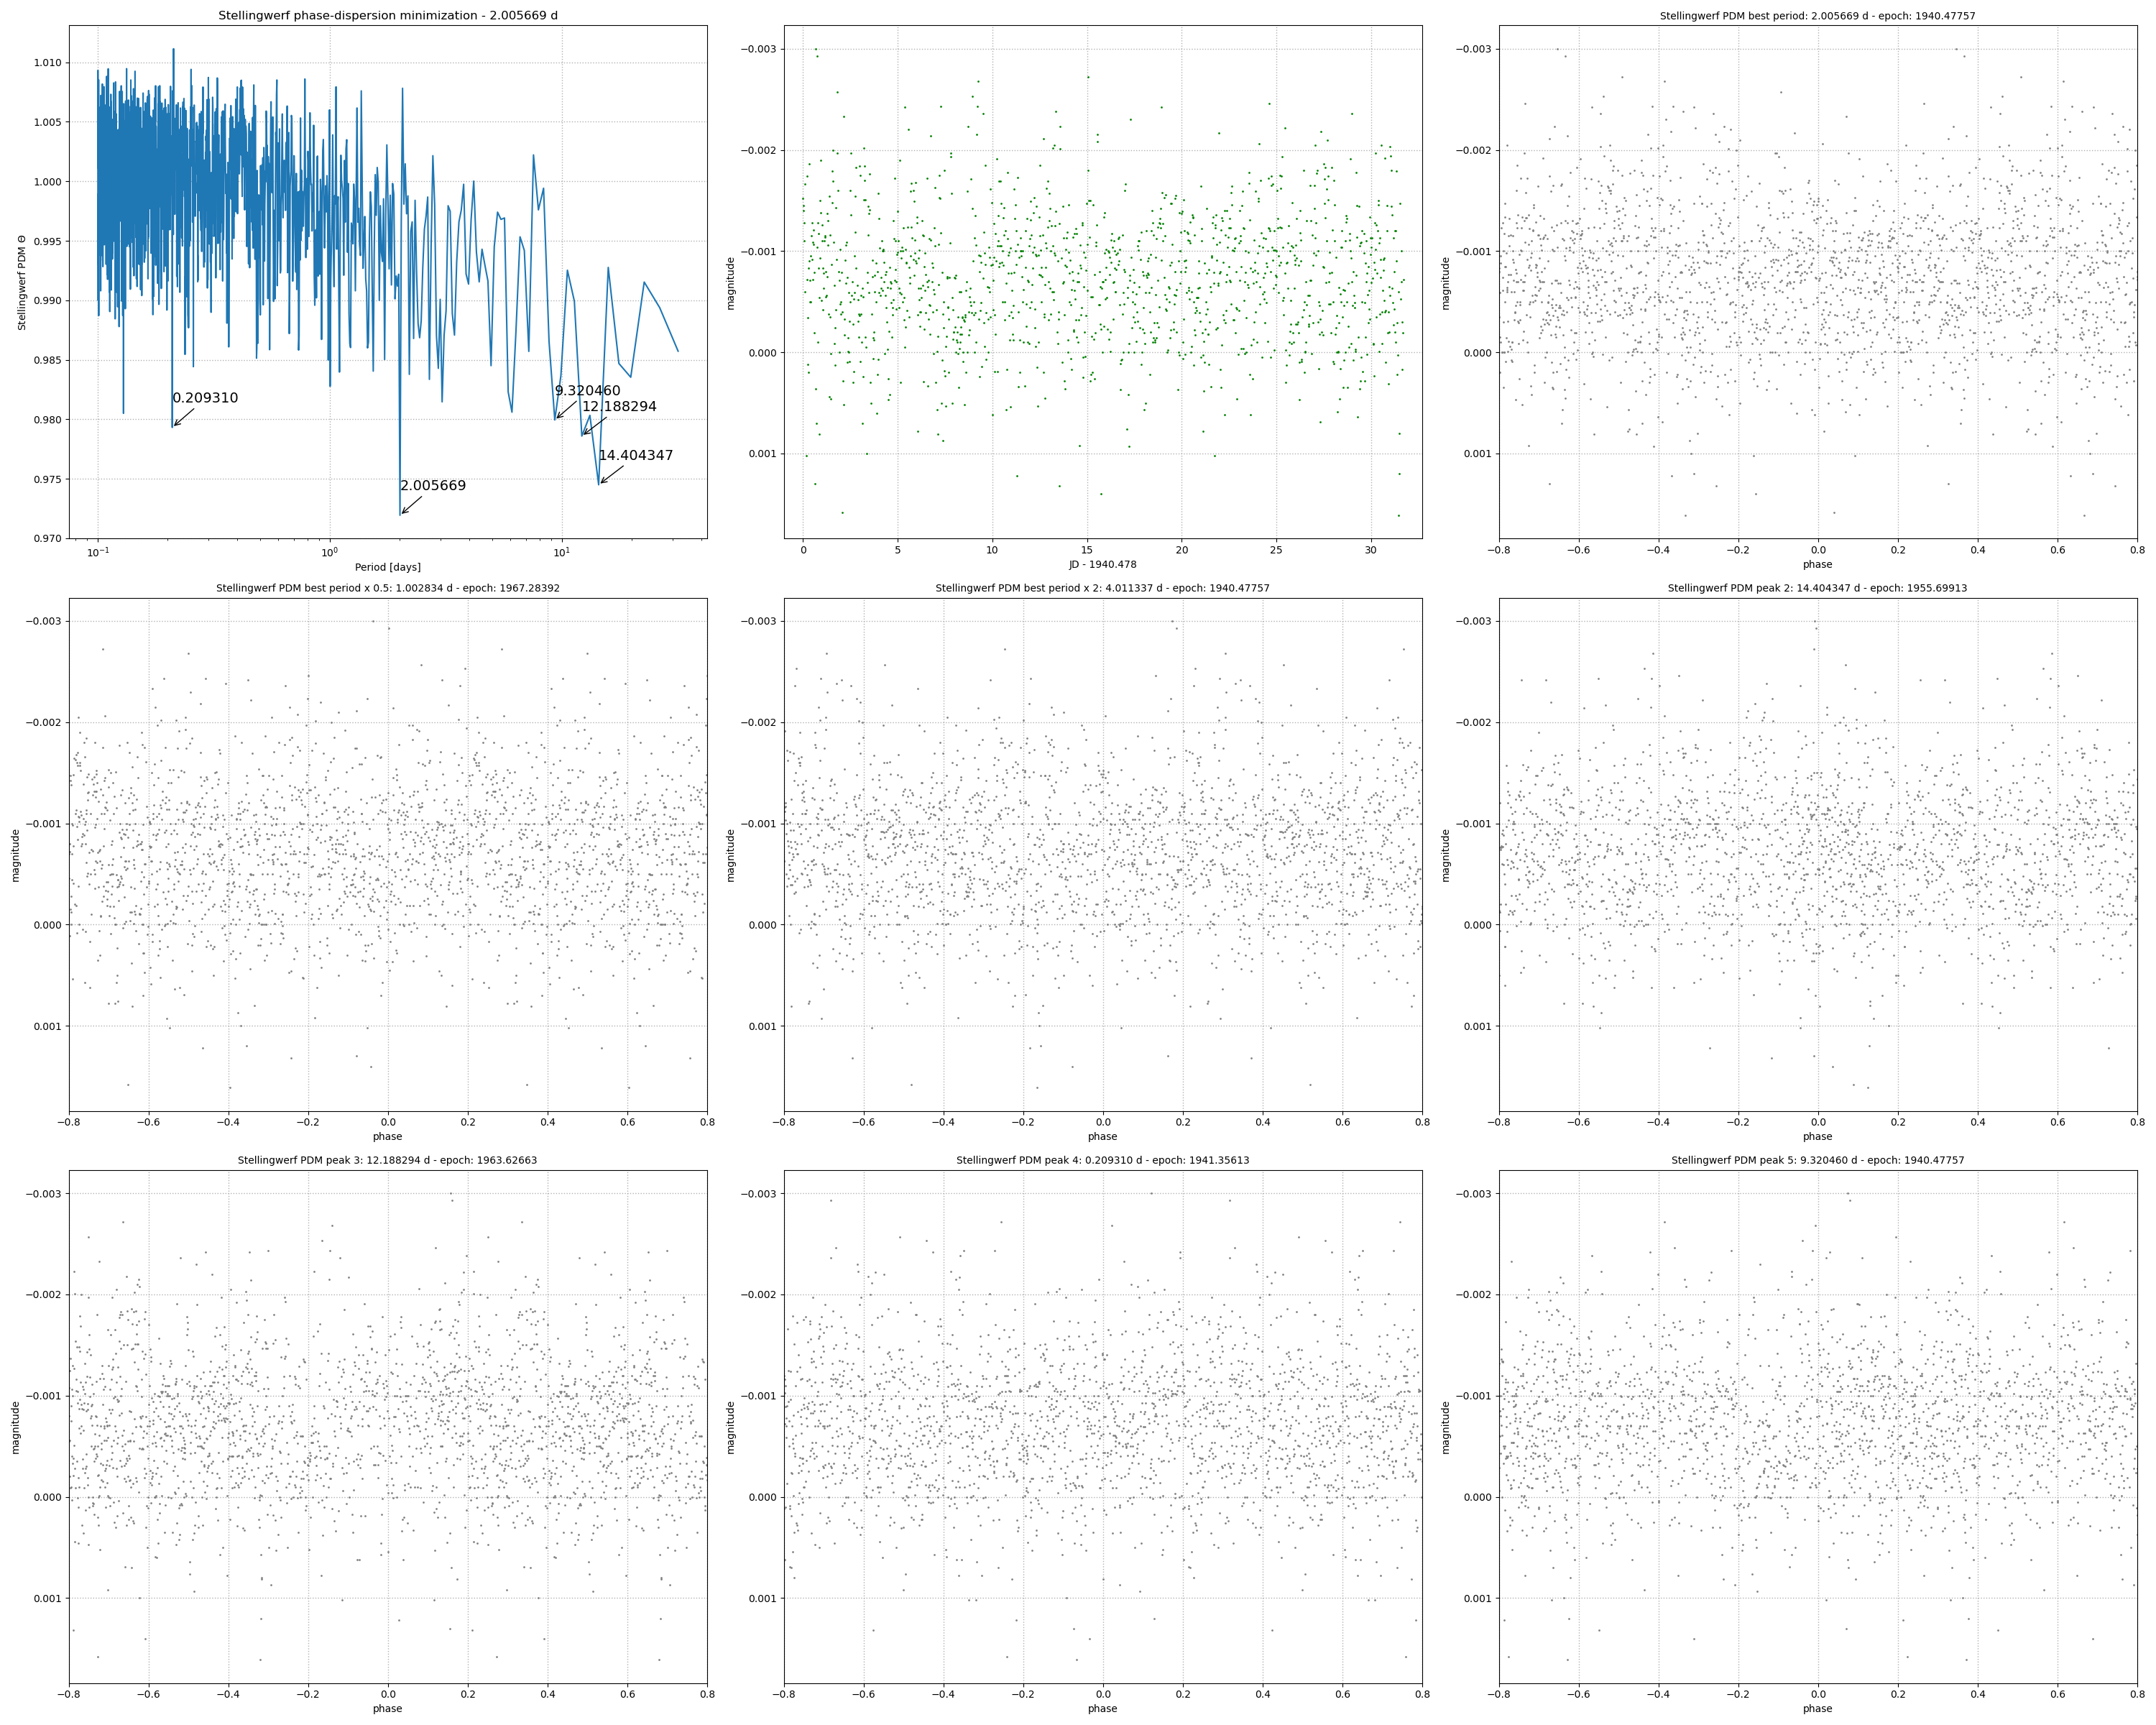

In [15]:
Image('0001028-checkplot-spdm.png')

In [16]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [2.005668618354433, 14.404347350000016, 12.188293911538478, 0.2093101992734481, 9.320460050000012] (days)
